### Property Price Prediction

In [3]:
# Importing Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv(r"C:\Users\Vicky Yewle\Downloads\Machine Learning\Datasets\property price project\Dataset\test.csv")
df2 = pd.read_csv(r"C:\Users\Vicky Yewle\Downloads\Machine Learning\Datasets\property price project\Dataset\train.csv")

In [5]:
# test data 
df1.shape

(1459, 80)

In [6]:
#train data
df2.shape

(1460, 81)

In [7]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
print(df2.columns.difference(df1.columns))

Index(['SalePrice'], dtype='object')


In [10]:
#Hence from given we find out that there is similarity between two datasets hence we can concat these dataset
#create a unit dataset for analyzing it.

In [11]:
df2.drop(['SalePrice'],axis=1, inplace= True)

In [12]:
df2['Sample']= 'df2'
df1['Sample']= 'df1'

In [13]:
Prop = pd.concat([df2,df1],axis=0,sort=False) #Combine the data
Prop.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Sample
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,df2
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,df2
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,df2
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,df2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,df2


In [14]:
Prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [15]:
#We would need certain functions again and again to audit our data, lets
#create a package called Data_Auditor, which will tell us about the NA in
#Data , NA in column's and also help us perform some basic data manipulation

class Data_Auditor:
    def NA_in_Data(data_frame):
        result = (data_frame.isnull().sum().sum()) / (data_frame.shape[0] * data_frame.shape[1]) * 100
        return(print("Data has",round(result,2),"% NA's"))
    
    def Remove_Columns(data_frame,*args):
        list_of_cols = list(args)
        data_frame.drop(list_of_cols,axis = 1,inplace = True)
        
    def NA_in_Columns(data_frame):
        total_missing = data_frame.isnull().sum().sort_values(ascending=False)
        percent_missing = round(((data_frame.isnull().sum()/data_frame.isnull().count()).sort_values(ascending=False)*100),1)
        missing_data_frame = pd.concat([total_missing, percent_missing], axis=1, keys=['Missing_Obs', 'Percent_of_NA'])
        return(missing_data_frame.head(15))
        
    def Most_Frequent_Data(Data_frame,Column):
        Count = Data_frame[Column].value_counts()
        Percentage = round(((Data_frame[Column].value_counts()/Data_frame.shape[0])*100),2)
        Summary_data = pd.concat([Count, Percentage], axis=1, keys=['Count','Percentage'])
        return(Summary_data)

In [16]:
#There are a lot of NA's we need to investigate further
Data_Auditor.NA_in_Data(Prop)

Data has 5.91 % NA's


In [17]:
Data_Auditor.NA_in_Columns(Prop)

,Missing_Obs,Percent_of_NA
PoolQC,2909,99.7
MiscFeature,2814,96.4
Alley,2721,93.2
Fence,2348,80.4
FireplaceQu,1420,48.6
LotFrontage,486,16.6
GarageCond,159,5.4
GarageYrBlt,159,5.4
GarageFinish,159,5.4
GarageQual,159,5.4


In [18]:
Prop["PoolQC"] = Prop["PoolQC"].fillna("No pool")
Prop["MiscFeature"] = Prop["MiscFeature"].fillna("No MiscFeature")
Prop["Alley"] = Prop["Alley"].fillna("No alley")
Prop["Fence"] = Prop["Fence"].fillna("No fence")
Prop["FireplaceQu"] = Prop["FireplaceQu"].fillna("No fireplace")

In [19]:
Prop['LotFrontage'].isnull().sum()#values.any()

486

In [20]:
Prop['Neighborhood'].isnull().sum()

0

In [21]:
Prop.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [22]:
Prop['LotFrontage'] = Prop['LotFrontage'].fillna(Prop.groupby('Neighborhood')['LotFrontage'].transform('median'))

In [23]:
Garage_cols = [columns for columns in Prop if columns.startswith('Garage')]

for columns in Garage_cols:
    if Prop[columns].dtypes == 'float64':
        Prop[columns] = 0
    else:
        Prop[columns] = 'No_Garage'

del Garage_cols 

In [24]:
#selecting those columns that contain location of object data type of basement column

Basement_cols_Prop = Prop.loc[:,Prop.columns.str.contains("Basement")]
Basement_cols_Prop_2 = Prop.loc[:,Prop.columns.str.contains("Bsmt")]
Basement_cols_Prop_3 = Prop['BsmtExposure']
Basement = pd.concat([Basement_cols_Prop, Basement_cols_Prop_2, Basement_cols_Prop_3], axis=1)

In [25]:
del Basement_cols_Prop
del Basement_cols_Prop_2
del Basement_cols_Prop_3

In [26]:
        
for columns in Basement.columns:
    if Prop[columns].dtypes == 'float64':
        Prop[columns] = Prop[columns].fillna(0)
    else:
        Prop[columns] = Prop[columns].fillna('No_Basement')

In [27]:
Data_Auditor.NA_in_Columns(Prop)

,Missing_Obs,Percent_of_NA
MasVnrType,24,0.8
MasVnrArea,23,0.8
MSZoning,4,0.1
Utilities,2,0.1
Functional,2,0.1
SaleType,1,0.0
Exterior1st,1,0.0
Electrical,1,0.0
KitchenQual,1,0.0
Exterior2nd,1,0.0


In [28]:
# as we found that there is NA is vnr type and vnr area we will remove them 
Prop["MasVnrType"] = Prop["MasVnrType"].fillna("None")
Prop["MasVnrArea"] = Prop["MasVnrArea"].fillna(0)

In [29]:
# for checking the most frequent data to be used in MS zoning we will run the loop.
Data_Auditor.Most_Frequent_Data(Prop,'MSZoning')

,Count,Percentage
RL,2265,77.60
RM,460,15.76
FV,139,4.76
RH,26,0.89
C (all),25,0.86


In [30]:
# As there is max data of RL in MSZoning we will fill that data in MSZoning
Prop['MSZoning'] = Prop['MSZoning'].fillna(Prop['MSZoning'].mode()[0])

In [31]:
#Utility Type
Data_Auditor.Most_Frequent_Data(Prop,'Utilities')

,Count,Percentage
AllPub,2916,99.90
NoSeWa,1,0.03


In [32]:
Prop['Utilities']=Prop['Utilities'].fillna(Prop['Utilities'].mode()[0])

In [33]:
Data_Auditor.Most_Frequent_Data(Prop,'Functional')

,Count,Percentage
Typ,2717,93.08
Min2,70,2.40
Min1,65,2.23
Mod,35,1.20
Maj1,19,0.65
Maj2,9,0.31
Sev,2,0.07


In [34]:
Prop['Functional'] = Prop['Functional'].fillna(Prop['Functional'].mode()[0])

In [35]:
Data_Auditor.Most_Frequent_Data(Prop,'SaleType')

,Count,Percentage
WD,2525,86.50
New,239,8.19
COD,87,2.98
ConLD,26,0.89
CWD,12,0.41
ConLI,9,0.31
ConLw,8,0.27
Oth,7,0.24
Con,5,0.17


In [36]:
Prop['SaleType'] = Prop['SaleType'].fillna(Prop['SaleType'].mode()[0])

In [37]:
Data_Auditor.Most_Frequent_Data(Prop,'Exterior1st')

,Count,Percentage
VinylSd,1025,35.11
MetalSd,450,15.42
HdBoard,442,15.14
Wd Sdng,411,14.08
Plywood,221,7.57
CemntBd,126,4.32
BrkFace,87,2.98
WdShing,56,1.92
AsbShng,44,1.51
Stucco,43,1.47


In [38]:
Prop['Exterior1st'] = Prop['Exterior1st'].fillna(Prop['Exterior1st'].mode()[0])

In [39]:
Data_Auditor.Most_Frequent_Data(Prop,['Electrical'])

,Count,Percentage
Electrical,,
SBrkr,2671,91.50
FuseA,188,6.44
FuseF,50,1.71
FuseP,8,0.27
Mix,1,0.03


In [40]:
Prop['Electrical'] = Prop['Electrical'].fillna(Prop['Electrical'].mode()[0])

In [41]:
Data_Auditor.Most_Frequent_Data(Prop,['KitchenQual'])

,Count,Percentage
KitchenQual,,
TA,1492,51.11
Gd,1151,39.43
Ex,205,7.02
Fa,70,2.40


In [42]:
Prop['KitchenQual'] = Prop['KitchenQual'].fillna(Prop['KitchenQual'].mode()[0])

In [43]:
Data_Auditor.Most_Frequent_Data(Prop,['Exterior2nd'])

,Count,Percentage
Exterior2nd,,
VinylSd,1014,34.74
MetalSd,447,15.31
HdBoard,406,13.91
Wd Sdng,391,13.39
Plywood,270,9.25
CmentBd,126,4.32
Wd Shng,81,2.77
Stucco,47,1.61
BrkFace,47,1.61


In [44]:
Prop['Exterior2nd'] = Prop['Exterior2nd'].fillna(Prop['Exterior2nd'].mode()[0])

In [45]:
Data_Auditor.NA_in_Data(Prop)

Data has 0.0 % NA's


In [46]:
# first check the info and then we get that ID is a unique part given in the following data. 
# So we will remove that part to get the values

In [47]:
Data_Auditor.Remove_Columns(Prop,'Id')

In [48]:
#Since total SqFt is an important feature  in selecting house we add them up
Prop['Total_HouseArea_SqFt'] = Prop['TotalBsmtSF'] + Prop['1stFlrSF'] + Prop['2ndFlrSF']
Prop['Total_HouseArea_SqFt']

0       2566.0
1       2524.0
2       2706.0
3       2473.0
4       3343.0
         ...  
1454    1638.0
1455    1638.0
1456    2448.0
1457    1882.0
1458    2996.0
Name: Total_HouseArea_SqFt, Length: 2919, dtype: float64

In [49]:
Prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            2919 non-null   int64  
 1   MSZoning              2919 non-null   object 
 2   LotFrontage           2919 non-null   float64
 3   LotArea               2919 non-null   int64  
 4   Street                2919 non-null   object 
 5   Alley                 2919 non-null   object 
 6   LotShape              2919 non-null   object 
 7   LandContour           2919 non-null   object 
 8   Utilities             2919 non-null   object 
 9   LotConfig             2919 non-null   object 
 10  LandSlope             2919 non-null   object 
 11  Neighborhood          2919 non-null   object 
 12  Condition1            2919 non-null   object 
 13  Condition2            2919 non-null   object 
 14  BldgType              2919 non-null   object 
 15  HouseStyle           

In [50]:
#DATA CONVERSION
#Encoding some categorical variables into Ordered Numeric Variable as they are ranked
#variables

from sklearn.preprocessing import LabelEncoder

columns = ('FireplaceQu','Exterior1st','Exterior2nd','BsmtFinType2',
        'HouseStyle','RoofStyle','YrSold','BsmtQual','BsmtCond',
        'GarageQual','GarageCond','ExterCond','HeatingQC',
        'PoolQC','KitchenQual','BsmtFinType1','Functional','Fence',
        'BsmtExposure','GarageFinish','LandSlope','PavedDrive','Street',
        'CentralAir','BldgType','OverallCond','MoSold')


In [51]:
# process columns, apply LabelEncoder to categorical features

for cols in columns:
    lbl = LabelEncoder() 
    lbl.fit(list(Prop[cols].values)) 
    Prop[cols] = lbl.transform(list(Prop[cols].values))


In [52]:
#Dummy Value Encoding
Prop = pd.get_dummies(Prop)
print(Prop.shape)

(2919, 182)


In [53]:
#Split Test and Train Data
#Train
df2_Prop = Prop[Prop['Sample_df2'] == 1]

In [54]:
del df2_Prop['Sample_df2']
del df2_Prop['Sample_df1']

In [55]:
df=pd.read_csv(r"C:\Users\Vicky Yewle\Downloads\Machine Learning\Datasets\property price project\Dataset\train.csv")

In [56]:
df2_Prop = pd.concat([df2_Prop, df['SalePrice']], axis=1).reindex(df2_Prop.index)

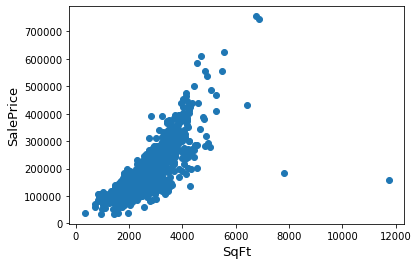

In [57]:
#Lets check for outliers
fig, ax = plt.subplots()
ax.scatter(x = df2_Prop['Total_HouseArea_SqFt'], y = df2_Prop['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('SqFt', fontsize=13)
plt.show()


In [58]:
#Removing Outliers
df2_Prop = df2_Prop.drop(df2_Prop[(df2_Prop['SalePrice']<200000) &
                                        (df2_Prop['Total_HouseArea_SqFt']>7500)].index)

In [59]:

#Test
df1_Prop = Prop[Prop['Sample_df1'] == 1]
del df1_Prop['Sample_df1']
del df1_Prop['Sample_df2']

In [60]:

#Creating Train Test Data Split for Model 
X_train = df2_Prop[df2_Prop.columns[df2_Prop.columns != 'SalePrice']]
y_train = df2_Prop[df2_Prop.columns[df2_Prop.columns == 'SalePrice']]

In [61]:

#First Model Simple Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
r_sq = model.score(X_train,y_train) #R-Square

B0 = model.intercept_
B1_to_Bk = model.coef_

In [62]:
#Prediction
Output_df2 = model.predict(X_train)
Output_df1 = model.predict(df1_Prop)

In [63]:
#Finding MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df2_Prop['SalePrice'],Output_df2)

15029.144050202738

In [64]:
#Pro Model -----> Ridge Model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

lambdas=np.linspace(1,100,10)
params={'alpha':lambdas}
ridge_model = Ridge(fit_intercept=True)
grid_search = GridSearchCV(ridge_model,
                           param_grid=params,
                           cv=10,
                           scoring='neg_mean_absolute_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.])},
             scoring='neg_mean_absolute_error')

In [65]:
grid_search.fit(X_train,y_train)
grid_search.best_estimator_
grid_search.cv_results_
grid_search.best_estimator_.score(X_train,y_train) #R-Square

0.9180232692614624

In [66]:
#Prediction
ridge_model_y_train = grid_search.best_estimator_.predict(X_train)
ridge_model_y = grid_search.best_estimator_.predict(df1_Prop)


In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Pro Model Lasso Model
lambdas=np.linspace(0.001,0.1,100)
lasso_model = Lasso(fit_intercept=True)
params = {'alpha':lambdas}
grid_search = GridSearchCV(lasso_model,
                           param_grid=params,
                           cv=10,
                           scoring='neg_mean_absolute_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ])},
             scoring='neg_mean_absolute_error')

In [68]:
grid_search.best_estimator_
grid_search.best_estimator_.score(X_train,y_train) #R-Square

0.923694066321998

In [69]:
#Prediction
lasso_model_y_train = grid_search.best_estimator_.predict(X_train)
lasso_model_y = grid_search.best_estimator_.predict(df1_Prop)

In [71]:
#Finding MAE
mean_absolute_error(df2_Prop['SalePrice'],lasso_model_y_train)

15029.15266924701